輸入立委臉書粉專內容及選舉政見資料

In [76]:
import pandas as pd
import jieba
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

pd.set_option('display.max_colwidth', None)#setting the maximize string show

fb = pd.read_csv('nysu_10902_2019立委_research_補.csv')
politics = pd.read_csv('9th_legislator_promise.csv')
fb.page_name.unique() #觀察人名在資料集中叫什麼名字
politics.姓名.unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

楊曜為例，建立發文文字斷詞表

---



In [77]:
yang = fb[fb.page_name == "楊曜Yangyao"]
yang.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
330,220796314615357_2481814108513555,220796314615357,楊曜Yangyao,Politician,楊曜向漁業署成功爭取了1億8千萬的中央預算，針對澎湖漁港設施、漁業發展及種苗放流等計畫進行補助，相關工作交由澎湖縣政府規劃、執行。今日特別邀請漁業署副署長、澎湖縣政府及議會劉陳昭玲議長共同會勘相關港埠設施不良、淘空及清淤等問題。\n\n楊曜在立法院的會期中每天往返台北及澎湖，向中央政府爭取預算；，休會期間也持續到處勘查地方需要的建設，爭取我們的權益。這就是楊曜七年來的生活日常，跟大家一樣，認真做自己該做的工作。\n\n#起風的日子記得戴帽子,NaN,photo,https://www.facebook.com/220796314615357/posts/2481814108513555/,2019-01-15T10:22:51+0000,2019-01-15T18:22:51,...,Photos from 楊曜Yangyao's post,NaN,175,0,0,0,0,0,1,3


In [78]:
yang['new_date'] = pd.to_datetime(yang['created_time_taipei']).dt.date
yang['month_year'] = pd.to_datetime(yang['new_date']).dt.to_period('M')
yang.head(1)

<ipython-input-78-847d862dd572>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yang['new_date'] = pd.to_datetime(yang['created_time_taipei']).dt.date
<ipython-input-78-847d862dd572>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yang['month_year'] = pd.to_datetime(yang['new_date']).dt.to_period('M')


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
330,220796314615357_2481814108513555,220796314615357,楊曜Yangyao,Politician,楊曜向漁業署成功爭取了1億8千萬的中央預算，針對澎湖漁港設施、漁業發展及種苗放流等計畫進行補助，相關工作交由澎湖縣政府規劃、執行。今日特別邀請漁業署副署長、澎湖縣政府及議會劉陳昭玲議長共同會勘相關港埠設施不良、淘空及清淤等問題。\n\n楊曜在立法院的會期中每天往返台北及澎湖，向中央政府爭取預算；，休會期間也持續到處勘查地方需要的建設，爭取我們的權益。這就是楊曜七年來的生活日常，跟大家一樣，認真做自己該做的工作。\n\n#起風的日子記得戴帽子,NaN,photo,https://www.facebook.com/220796314615357/posts/2481814108513555/,2019-01-15T10:22:51+0000,2019-01-15T18:22:51,...,175,0,0,0,0,0,1,3,2019-01-15,2019-01


In [79]:
# 依照按讚數 低到高排序
yang = yang.sort_values(by=['like_count'])
# 用新的排序當作順序
yang.reset_index(inplace=True)

結巴斷詞 jieba

1.   len(liu): 看劉櫂豪的貼文總共有幾筆
2.   list(liu['message']): 把要斷詞的內容轉成 list 格式
3.   創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
4.   原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [80]:
doc_names = range(len(yang)) #有幾篇文章 : 444 篇文章
doc_names

range(0, 121)

In [81]:
yang = yang.replace(np.nan, '', regex=True) # 將nan取代成空白字串
text_list = list(yang['message']) # 把所有message轉成一個list 用for iterate

What is the difference between lcult() & cut()

In [82]:
# 先看第一個
words = jieba.lcut(text_list[0], cut_all = False) # lcut return a "list"
print(words)

['政務委員應', '負責', '部會間', '的', '溝通', '協調', '\n', '民進', '黨', '執政下', '的', '超級', '大', '政委', '，', '卻', '有', '權無責', '\n', '\n', '政委', '無需', '接受', '立法', '委員', '的', '質詢', '，', '不應', '該', '取代', '部長', '的', '決策', '權力', '，', '造成', '有權', '無責', '；', '特別', '是', '政委', '介入', '地方', '事務', '，', '不僅', '不', '符合', '政府', '體制', '，', '更', '因為', '他們', '離', '民意', '太遙遠', '，', '有', '可能', '做出', '錯誤', '的', '決策', '！', '\n', '\n', 'http', ':', '/', '/', 'bit', '.', 'ly', '/', '2AV7HRj', '\n', '\n', '#', '既', '前瞻', '又', '基礎', '的', '建設', '\n', '#', '花', '了', '大錢', '人民', '無感', '\n', '#', '民進', '黨', '應該', '聽', '聽', '不同', '的', '聲音']


In [83]:
words = jieba.cut(text_list[0], cut_all = False) 
print(words)
#for word in words:
 #   print(word)

<generator object Tokenizer.cut at 0x7fb7bf865040>


把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，劉櫂豪的篇數有999篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的劉櫂豪貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和liu_docs合併。</br> 最後我們liu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [84]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")
punctuation = " //，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

# creat a df to store the jieba result
yang_docs = pd.DataFrame(columns=['jieba_results']) # 建立df
yang_docs['jieba_results'] = yang_docs['jieba_results'].astype('str')

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text) # 把上面那些符號從text中刪掉
    text = re.sub(r'[0-9]','',text) # 刪掉數字
    text = re.sub(r'[a-zA-Z]','',text) #刪掉英文字
#刪除文字 更多標點符號
    text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗🎉⏰💪]','',text)  # 注意裡面不能有空白！
    s = pd.Series({'jieba_results': text})
    yang_docs = yang_docs.append(s, ignore_index=True)#每次的斷詞結果都加回liu_docs


In [85]:
#yang_docs.iloc[400:,]  #從讚數最多的檢查

In [86]:
yang['jieba_results'] = yang_docs
yang_post = yang[['new_date','message','jieba_results','like_count']]
yang_post

,new_date,message,jieba_results,like_count
0,2019-01-21,政務委員應負責部會間的溝通協調\n民進黨執政下的超級大政委，卻有權無責\n\n政委無需接受立法委員的質詢，不應該取代部長的決策權力，造成有權無責；特別是政委介入地方事務，不僅不符合政府體制，更因為他們離民意太遙遠，有可能做出錯誤的決策！\n\nhttp://bit.ly/2AV7HRj\n\n#既前瞻又基礎的建設\n#花了大錢人民無感\n#民進黨應該聽聽不同的聲音,政務委員應 負責 部會間 的 溝通 協調 民進 黨 執政下 的 超級 大 政委 卻 有 權無責 政委 無需 接受 立法 委員 的 質詢 不應 該 取代 部長 的 決策 權力 造成 有權 無責 特別 是 政委 介入 地方 事務 不僅 不 符合 政府 體制 更 因為 他們 離 民意 太遙遠 有 可能 做出 錯誤 的 決策 既 前瞻 又 基礎 的 建設 花 了 大錢 人民 無感 民進 黨 應該 聽 聽 不同 的 聲音,91
1,2019-04-15,勞動部業於3月4日預告修正漁船船員為勞動基準法第84條之一之工作者（俗稱責任制），楊曜表示漁船作業時間與型態特殊，陸上工作的樣態難以作為比較，工作時間受氣候、漁汛因素影響，有時可能連續休息半個月以上，有時可能需要連續工作超過8小時。此外，漁船主或船長跟漁工的關係不只是約聘關係，更是夥伴關係，漁撈進行時，船長跟漁工工作在一塊，根本無法分辨誰是雇主、誰是漁工，因此將漁船船員列為84-1條的工作者是有利於漁撈產業\n\n勞基法84-1條的工作契約需要經過地方政府核備，楊曜之前已於立法院質詢要求勞動部、漁業署要儘快商討漁船工作契約的相關樣態，協助漁船主及船長能順利與漁工簽訂工作契約，也讓未來地方政府能順利核備相關的工作契約。\n\n今日漁業署將於下午三點在澎湖區漁會向漁民朋友說明修法的要點，邀請各位漁船主能到場瞭解相關的修法內容。,勞動 部業 於 月 日 預告 修正 漁船 船員為 勞動 基準法 第 條 之一 之 工作者 俗稱 責任制 楊曜 表示 漁船 作業 時間 與 型態 特殊 陸上 工作 的 樣態 難以 作為 比 較 工作 時間 受氣候 漁汛 因素 影響 有時 可能 連續 休息 半個 月 以上 有時 可能 需要 連續 工作 超過 小時 此外 漁 船主 或 船長 跟 漁工的關 係 不 只是 約聘關 係 更是 夥 伴關 係 漁撈 進行 時 船長 跟 漁工 工作 在 一塊 根本 無法 分辨 誰 是 雇主 誰 是 漁工 因此 將漁船 船員列 為 條的 工作者 是 有利於 漁撈 產業 勞基法 條的 工作 契約 需要 經過 地方 政府 核備 楊曜 之前 已 於 立法院 質詢 要求 勞動部 漁業署 要 儘 快 商 討 漁 船 工作 契約 的 相關 樣態 協助 漁 船主 及 船長 能 順利 與 漁工 簽訂 工作 契約 也 讓 未來 地方 政府 能 順利 核備 相關 的 工作 契約 今日 漁業 署將 於 下午 三點 在 澎湖 區漁會 向 漁民 朋友 說明 修法 的 要點 邀請 各位 漁 船主 能到場 瞭解 相關 的 修法 內容,93
2,2019-03-20,國內航空罷工應設預告制度\n\n今日衛環委員會討論勞工罷工日期是否需要預告，楊曜支持勞工朋友爭取應有的權益，不過針對「國內航空」若發生罷工情勢，應有預告制度。國內航空是離島居民「無可取代」的交通工具，居民要返家、要就醫等等只能依靠國內航空的運輸。勞動部應協助以團體協約或修法的方式讓國內航空罷工有預告制度，讓政府相關單位能及早規劃離島輸運，捍衛離島居民最基本「行」得權利。\n\n另外針對勞動部預告修正漁船船員為勞動基準法第84條之一之工作者，楊曜表示漁船作業型態特殊，工作時間受氣候因素、漁汛因素影響，無法以陸上工作型態作為比擬，因此將漁船船員列為84-1條的工作者是有利於漁撈產業。未來漁船主與勞工所簽訂的契約需要透過地方政府的核備監督，不過由於漁業工作型態的特殊性，地方政府在核備的過程中可能會產生相關疑義，勞動部應儘快跟漁業署商討工作契約的相關樣態，以利修法後的政策推動。,國內 航空 罷工 應設 預告 制度 今日 衛環委員會 討論 勞工 罷工 日期 是否 需要 預告 楊曜 支持 勞工 朋友 爭取 應有 的 權益 不過 針對 國內 航空 若 發生 罷工 情勢 應有 預告 制度 國內 航空 是 離島 居民 無可 取代 的 交通工具 居民 要 返家 要 就醫 等等 只能 依靠 國內 航空 的 運輸 勞動部 應協助 以團體 協約 或 修法 的 方式 讓 國內 航空 罷工有 預告 制度 讓 政府 相關 單位 能 及早 規劃 離島 輸運 捍衛 離島 居民 最 基本 行 得 權利 另外 針對 勞動部 預告 修正 漁船 船員為 勞動 基準法 第 條 之一 之 工作者 楊曜 表示 漁船 作業 型態 特殊 工作 時間 受氣候 因素 漁汛 因素 影響 無法 以陸 上 工作 型態 作為 比擬 因此 將漁船 船員列 為 條的 工作者 是 有利於 漁撈 產業 未來 漁 船主 與 勞工 所 簽訂 的 契約 需要 透過 地方 政府 的 核備 監督 不過 由 於 漁業 工作 型態 的 特殊性 地方 政府 在 核備 的 過程 中 可能 會產生 相關 疑義 勞動部 應 儘 快 跟 漁 業 署 商 討 工作 契約 的 相關 樣態 以利 修法 後 的 政策 推動,99
3,2019-02-10,合橫國小每月淨灘三週年\n（https://youtu.be/H0yA2HY_DCw）\n季風下成長的海子\n清理海廢的小鬥士\n\n合橫國小，位於跨海大橋西嶼頭的這端，由「合界」、「橫礁」兩個村落的學童組成的小學校，是全縣唯一一間同時冠入兩個村莊名字的學校，且全校學生人數僅有二十幾人。而學校規模雖然小，卻沒有限制全校師生的多元發展，老師們都相當用心，盡可能讓所有學生都能接觸更多元的課外活動，從20幾年前發展的扯鈴隊，到後來需要所有高年級男生參與才能成隊的桌球隊，都在全縣有相當亮眼的成績和響亮的名氣，近年來更獲得教育卓越金質獎和國家環境教育獎等高度肯定。\n\n學校比鄰沙灘，由於地理位置，在冬季，一出東側門便會受到強烈海風影響，在海洋廢棄物這麼多的年代，冬天的沙灘往往會堆積許多海廢物品。合橫國小的師生便開始進行每月淨灘的活動，至今已持續超過三年，政府推動環境教育多年，合橫國小的師生才是真正的環境教育落實者！\n\n#校內有很多利用海廢做成的藝術品\n#一所了不起的迷你國小\n#我和我兒子都從這裡畢業,合橫國 小 每月 淨灘 三 週年 季風下 成長 的 海子 清理 海廢 的 小鬥士 合橫國 小 位 於 跨海 大橋 西嶼頭 的 這端 由 合界 橫礁 兩個 村落 的 學童 組成 的 小學校 是 全縣 唯一一 間 同時 冠入 兩個 村莊 名字 的 學校 且 全校 學 生人 數僅 有 二十 幾人 而學校 規模 雖然 小 卻 沒 有 限制 全校 師生 的 多元 發展 老師們 都 相當 用心 盡 可能 讓 所有 學生 都 能 接觸 更 多元 的 課外 活動 從 幾 年前 發展 的 扯 鈴隊 到後來 需要 所有 高年級 男生 參與 才能 成隊 的 桌球 隊 都 在 全縣 有 相當 亮眼 的 成績 和 響亮 的 名氣 近年 來 更 獲得 教育 卓越 金質獎 和 國家 環境 教育 獎等 高度肯定 學校 比鄰 沙灘 由 於 地理位置 在 冬季 一出 東側 門便 會 受到 強烈 海風 影響 在 海洋 廢棄物 這麼 多 的 年代 冬天 的 沙灘 往往 會 堆積 許多海 廢 物品 合橫國 小 的 師生 便 開始 進行 每月 淨灘 的 活動 至今 已持續 超過 三年 政府 推動 環境 教育 多年 合橫國 小 的 師生 才 是 真正 的 環境 教育 落實者 校內 有 很多 利用 海廢 做成 的 藝術品 一所 了不起 的 迷你 國小 我 和 我 兒子 都 從 這裡 畢業,102
4,2019-01-18,續辦燈光節\n希望點亮秋季旅遊市場\n\n連續四天參加由澎管處召開秋季旅遊推廣座談會，聽取來自旅遊相關產業成員及公會幹部的建議。楊曜在此特別感謝旅遊相關產業這三年來對於推動延長旅遊季節的努力，活動從2016年鎖港光雕節、2017年運動賽事結合觀光、2018觀音亭國際燈光節等，各項秋季帶狀與主題活動在大家不斷的檢討及建議下，逐步改進、努力。\n\n延長澎湖秋季旅遊的工作不容易，楊曜今年也向觀光局爭取到經費預計將國際燈光節擴大辦理，讓澎湖的秋天旅遊能夠在帶狀及各項主題活動的推展下，讓台灣及國際旅客更瞭解到秋天的澎湖也很好玩，秋遊澎湖很舒服。\n\n＃國際燈光節預計8月提早點亮,續辦 燈光節 希望 點亮 秋季 旅遊 市場 連續 四天 參加 由澎管 處 召開 秋季 旅遊 推廣座 談會 聽取 來 自 旅遊 相關 產業 成員及 公會 幹部 的 建議 楊曜 在 此 特別 感謝 旅遊 相關 產業 這 三年 來 對 於 推動 延長 旅遊 季節 的 努力 活動 從 年鎖 港光 雕節 年 運動賽 事 結合 觀光 觀音亭 國際燈 光節 等 各項 秋季 帶狀 與 主題 活動 在 大家 不斷 的 檢討及 建議 下 逐步 改進 努力 延長 澎湖 秋季 旅遊 的 工作 不 容易 楊曜 今年 也 向 觀光 局爭 取到 經費 預計 將國際 燈光節 擴大 辦理 讓 澎湖 的 秋天 旅遊 能夠 在 帶 狀及 各項 主題 活動 的 推展 下 讓 台灣 及國際 旅客 更 瞭解 到 秋天 的 澎湖 也 很 好玩 秋遊 澎湖 很 舒服 國際

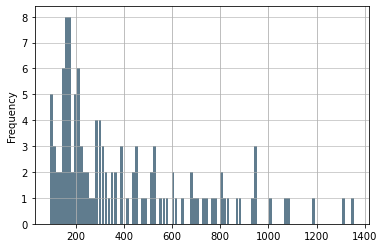

In [87]:
# 看讚數的分佈 y 軸是該讚數的貼文數 來看我們要怎麼取哪個讚數區間資料
commutes = yang_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [88]:
temp = yang_post[(yang_post['like_count'] <= 500) & (yang_post['like_count'] > 100)] #讚數大於500 小於1000才取 : 201  篇文章
temp

,new_date,message,jieba_results,like_count
3,2019-02-10,合橫國小每月淨灘三週年\n（https://youtu.be/H0yA2HY_DCw）\n季風下成長的海子\n清理海廢的小鬥士\n\n合橫國小，位於跨海大橋西嶼頭的這端，由「合界」、「橫礁」兩個村落的學童組成的小學校，是全縣唯一一間同時冠入兩個村莊名字的學校，且全校學生人數僅有二十幾人。而學校規模雖然小，卻沒有限制全校師生的多元發展，老師們都相當用心，盡可能讓所有學生都能接觸更多元的課外活動，從20幾年前發展的扯鈴隊，到後來需要所有高年級男生參與才能成隊的桌球隊，都在全縣有相當亮眼的成績和響亮的名氣，近年來更獲得教育卓越金質獎和國家環境教育獎等高度肯定。\n\n學校比鄰沙灘，由於地理位置，在冬季，一出東側門便會受到強烈海風影響，在海洋廢棄物這麼多的年代，冬天的沙灘往往會堆積許多海廢物品。合橫國小的師生便開始進行每月淨灘的活動，至今已持續超過三年，政府推動環境教育多年，合橫國小的師生才是真正的環境教育落實者！\n\n#校內有很多利用海廢做成的藝術品\n#一所了不起的迷你國小\n#我和我兒子都從這裡畢業,合橫國 小 每月 淨灘 三 週年 季風下 成長 的 海子 清理 海廢 的 小鬥士 合橫國 小 位 於 跨海 大橋 西嶼頭 的 這端 由 合界 橫礁 兩個 村落 的 學童 組成 的 小學校 是 全縣 唯一一 間 同時 冠入 兩個 村莊 名字 的 學校 且 全校 學 生人 數僅 有 二十 幾人 而學校 規模 雖然 小 卻 沒 有 限制 全校 師生 的 多元 發展 老師們 都 相當 用心 盡 可能 讓 所有 學生 都 能 接觸 更 多元 的 課外 活動 從 幾 年前 發展 的 扯 鈴隊 到後來 需要 所有 高年級 男生 參與 才能 成隊 的 桌球 隊 都 在 全縣 有 相當 亮眼 的 成績 和 響亮 的 名氣 近年 來 更 獲得 教育 卓越 金質獎 和 國家 環境 教育 獎等 高度肯定 學校 比鄰 沙灘 由 於 地理位置 在 冬季 一出 東側 門便 會 受到 強烈 海風 影響 在 海洋 廢棄物 這麼 多 的 年代 冬天 的 沙灘 往往 會 堆積 許多海 廢 物品 合橫國 小 的 師生 便 開始 進行 每月 淨灘 的 活動 至今 已持續 超過 三年 政府 推動 環境 教育 多年 合橫國 小 的 師生 才 是 真正 的 環境 教育 落實者 校內 有 很多 利用 海廢 做成 的 藝術品 一所 了不起 的 迷你 國小 我 和 我 兒子 都 從 這裡 畢業,102
4,2019-01-18,續辦燈光節\n希望點亮秋季旅遊市場\n\n連續四天參加由澎管處召開秋季旅遊推廣座談會，聽取來自旅遊相關產業成員及公會幹部的建議。楊曜在此特別感謝旅遊相關產業這三年來對於推動延長旅遊季節的努力，活動從2016年鎖港光雕節、2017年運動賽事結合觀光、2018觀音亭國際燈光節等，各項秋季帶狀與主題活動在大家不斷的檢討及建議下，逐步改進、努力。\n\n延長澎湖秋季旅遊的工作不容易，楊曜今年也向觀光局爭取到經費預計將國際燈光節擴大辦理，讓澎湖的秋天旅遊能夠在帶狀及各項主題活動的推展下，讓台灣及國際旅客更瞭解到秋天的澎湖也很好玩，秋遊澎湖很舒服。\n\n＃國際燈光節預計8月提早點亮,續辦 燈光節 希望 點亮 秋季 旅遊 市場 連續 四天 參加 由澎管 處 召開 秋季 旅遊 推廣座 談會 聽取 來 自 旅遊 相關 產業 成員及 公會 幹部 的 建議 楊曜 在 此 特別 感謝 旅遊 相關 產業 這 三年 來 對 於 推動 延長 旅遊 季節 的 努力 活動 從 年鎖 港光 雕節 年 運動賽 事 結合 觀光 觀音亭 國際燈 光節 等 各項 秋季 帶狀 與 主題 活動 在 大家 不斷 的 檢討及 建議 下 逐步 改進 努力 延長 澎湖 秋季 旅遊 的 工作 不 容易 楊曜 今年 也 向 觀光 局爭 取到 經費 預計 將國際 燈光節 擴大 辦理 讓 澎湖 的 秋天 旅遊 能夠 在 帶 狀及 各項 主題 活動 的 推展 下 讓 台灣 及國際 旅客 更 瞭解 到 秋天 的 澎湖 也 很 好玩 秋遊 澎湖 很 舒服 國際燈 光節 預計 月 提早 點亮,103
5,2019-01-07,今日與劉陳昭玲議長會見中油董事長戴謙，楊曜與議長共同要求中油要向澎湖各界定期回報油污整治進度，對於湖西民眾提出的公害糾紛協調事件儘速達成賠償共識，完成公糾程序。\n\n此外，楊曜表示從漏油事件之後，不斷向中油要求編列公安事件專屬的睦鄰回饋金，至今卻尚無消息；楊曜對此也表達強烈的不滿。\n\nhttps://goo.gl/oZz6JL,今日 與 劉陳昭玲 議長 會 見 中油 董事 長 戴謙 楊曜 與 議長 共同 要求 中油 要 向 澎湖 各界 定期 回報 油污 整治 進度 對 於 湖西 民眾 提出 的 公害 糾紛 協調 事件 儘 速 達 成 賠 償 共 識 完成 公糾 程序 此外 楊曜 表示 從 漏油 事件 之 後 不斷 向 中油 要求 編列 公安 事件 專屬 的 睦 鄰 回饋 金 至今 卻 尚 無 消息 楊曜 對 此 也 表達 強烈 的 不滿,106
6,2019-03-13,今日海巡署又取締一艘大陸漁船越界捕撈，該船也有攜帶豬肉，目前已交由農委會動植物防疫檢疫局逕予銷毀。\n\n大陸漁船頻繁越界，非洲豬瘟疫情也在大陸不斷蔓延，賴縣長上任後多次率團前往中國大陸，楊曜期盼賴峰偉縣長能護漁防疫方面多加著墨，有效地讓中國約束滾輪式漁船的越界問題，保護澎湖的海洋棲地、讓澎湖不要成為非洲豬瘟傳遞的破口。\n\nhttps://reurl.cc/mrQGj,今日 海巡 署 又 取締 一艘 大陸 漁船 越界 捕撈 該船 也 有 攜帶 豬肉 目前 已 交由 農委會動 植物 防疫 檢疫 局 逕 予 銷 毀 大陸 漁船 頻繁 越界 非洲 豬 瘟疫 情 也 在 大陸 不斷 蔓延 賴縣 長 上任 後 多次 率團 前往 中國大陸 楊曜 期盼 賴峰偉 縣長 能護 漁 防疫 方面 多加 著墨 有效 地 讓 中國約束 滾輪式 漁船 的 越界 問題 保護 澎湖 的 海洋 棲地 讓 澎湖 不要 成為 非洲 豬瘟 傳遞 的 破口,110
7,2019-06-11,離島居民交通權利不容犧牲\n交通部疏運方案值得肯定\n\n面對可能發生空服員罷工將影響肩負國內離島航線的立榮航空之航班調度，交通部援引重大節日的疏運計畫，預計由軍機投入國內與離島航線之運輸，此一政策與楊曜長期主張如遇國內線航空業罷工比照年節疏運的看法相同，楊曜肯定林佳龍部長捍衛離島居民的交通權利的決心與當擔。\n\n澎湖的空中運輸原本就非常吃緊，居民經常面臨一票難求之狀況，特別是立榮航空在澎湖與台灣之間的運輸擁有過半的航班，若是受罷工之影響而減班，澎湖居民要到台灣就醫、工作將面臨無機可搭之窘境 \n\n楊曜自擔任立委開始就與交通部、國防部訂定重大節日疏運計畫，民航及船舶運能都無法有效運輸的狀況下，國防部將以軍機協助載運離島居民往返之任務，面對罷工可能影響澎湖運能的狀況下，交通部主動援引疏運措施，捍衛離島居民的交通權利，楊曜再次表示肯定；也期盼勞資雙方能達成共識，讓事件能圓滿的落幕。\n\nhttps://udn.com/news/story/7241/3863448,離島 居民 交通 權利 不容 犧牲 交通部 疏運 方案 值得 肯定 面對 可能 發生空 服員罷 工將 影響 肩 負國內 離島 航線 的 立榮 航空 之 航班 調度 交通部 援引 重大 節日 的 疏 運計畫 預計 由 軍機 投入 國內 與 離島 航線 之 運輸 此一 政策 與 楊曜長 期主張 如 遇國 內線 航空 業罷工 比照 年節 疏運 的 看法 相同 楊曜 肯定 林佳龍 部長 捍衛 離島 居民 的 交通 權利 的 決心 與 當擔 澎湖 的 空中 運輸 原本 就 非常 吃緊 居民 經常面 臨 一票 難求 之 狀況 特別 是 立榮 航空 在 澎湖 與 台灣 之間 的 運輸 擁有 過半 的 航班 若 是 受 罷工 之 影響 而 減班 澎湖 居民 要 到 台灣 就醫 工作 將面 臨無機 可 搭 之 窘境 楊曜 自擔 任 立委 開始 就 與 交通部 國 防部 訂定 重大 節日 疏運計畫 民航 及 船舶 運能 都 無法 有效 運輸 的 狀況 下 國 防部 將以 軍機 協助載 運離島 居民 往返 之 任務 面對 罷工 可能 影響 澎湖 運能 的 狀況 下 交通部 主動 援引 疏運 措施 捍衛 離島 居民 的 交通 權利 楊曜 再次 表示 肯定 也 期盼 勞資 雙方能 達 成共識 讓 事件 能圓滿 的 落幕,111
...,...,...,...,...
80,2019-12-22,楊曜政績回顧（十五）\n\n【專科醫師駐地醫療及鼓勵診所假日看診】\n\n為充實離島地區醫師科別與人力，楊曜向衛福部提出辦理【強化澎湖地區專科醫療服務計畫】以及【假日照護醫療系統提出獎勵】，除將台灣本島醫院與離島合作，派駐專科醫師支援離島醫院，強化離島醫療外，也獎勵特約西醫診所例假日提供看診服務，提升診所假日看診誘因，守護鄉親健康沒有假期！,楊曜政績 回顧 十五 專科 醫師 駐 地 醫療 及 鼓勵 診所 假日 看診 為 充實 離島 地區 醫師 科別 與 人力 楊曜 向 衛福部 提出 辦理 強化 澎湖 地區 專科 醫療 服務 計畫 以及 假 日照 護醫療 系統 提出 獎勵 除將 台灣 本島 醫院 與 離島 合作 派 駐 專科 醫師 支援 離島 醫院 強化 離島 醫療 外 

TF-IDF
我們把剛才斷好詞的貼文，轉成list形式，全部放到corpus變數裡面，方便做tf-idf處理。

CountVectorizer算字頻（搭配fit_transform）
TfidfTransformer計算TFIDF

In [89]:
corpus = temp['jieba_results'].values.tolist() #如果不做這個、結果會不同 太generall

In [18]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  # 計算單字出現在文件中的次數
X = vectorizer.fit_transform(corpus) #  input must be a list, return a matrix (#of corpus) x (# of word) # 201 x 4835
word = vectorizer.get_feature_names() # column name which is the word
message_column = word

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  # 計算tfidf
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X) # X : corpus x word matrix, output:201 x 4835

In [90]:
tfidf_view = pd.DataFrame(tfidf.toarray(), columns = vectorizer.get_feature_names())
tfidf_view

,一個,一出,一台,一同,一場,一定,一帶,一年,一早,一月份,...,魚苗,鮮明,鳳凰,點爭,點開放,黨內,黨公職,黨部,鼓勵,龍頭
0,0.000000,0.083567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,0.000000,0.000000,0.132179,0.099185,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.056339,0.000000,0.000000,0.069291,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.082244
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.084303,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.168094,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [91]:
# #使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=8, random_state=None)
LDA.fit(X) # 用countrvectorizer() result 去fit 

topic_message = list()
#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    mes_topic = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(mes_topic)
    for i in mes_topic:
        topic_message.append(i)

TOP 10 WORDS PER TOPIC #0
['軍機', '選舉', '選票', '國會', '返鄉', '需求', '朋友', '協調', '澎湖', '楊曜']
TOP 10 WORDS PER TOPIC #1
['大橋', '中正', '政見', '跨海', '民航局', '遠東', '台北', '改建', '楊曜', '澎湖']
TOP 10 WORDS PER TOPIC #2
['要求', '航空', '立榮', '認真', '醫療', '運能', '民航局', '加班', '楊曜', '澎湖']
TOP 10 WORDS PER TOPIC #3
['觀光', '發展', '權益', '投入', '澎湖', '楊曜', '醫療', '航空', '立委', '離島']
TOP 10 WORDS PER TOPIC #4
['提高', '中心', '華信', '高雄', '海洋', '醫療', '加給', '離島', '楊曜', '澎湖']
TOP 10 WORDS PER TOPIC #5
['小英', '到場', '援會', '大會', '感謝', '住民', '澎湖', '成立', '蔡英文', '楊曜']
TOP 10 WORDS PER TOPIC #6
['動員', '人員', '以及', '公職', '拉票', '大家', '醫事', '醫院', '楊曜', '澎湖']
TOP 10 WORDS PER TOPIC #7
['一起', '議員', '美食', '駕照', '自用', '小船', '觀光', '朋友', '楊曜', '澎湖']


In [92]:

LDA.fit(tfidf) # 用tfidf result 去fit 

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['推動', '貸款', '蔡英文', '心導', '增加', '軍人', '創業', '楊曜', '引進', '澎湖']
TOP 10 WORDS PER TOPIC #1
['往高雄', '觀光', '公教', '加班', '加給', '澎湖', '楊曜', '起飛', '蔡英文', '競選總部']
TOP 10 WORDS PER TOPIC #2
['澎湖', '提高', '改建', '感謝', '一路', '立委', '以來', '航空', '離島', '楊曜']
TOP 10 WORDS PER TOPIC #3
['遠航', '華信', '蔡英文', '大家', '旅客', '楊曜', '遠東', '加班', '民航局', '澎湖']
TOP 10 WORDS PER TOPIC #4
['軍機', '朋友', '澎湖', '成立', '大家', '感謝', '蔡英文', '專款', '直升', '住民']
TOP 10 WORDS PER TOPIC #5
['朋友', '遠東', '馬拉松', '立榮', '運能', '台北', '美食', '醫療', '楊曜', '澎湖']
TOP 10 WORDS PER TOPIC #6
['進步', '醫事', '認真', '做事', '晚上', '我們', '澎湖', '醫療', '一起', '醫院']
TOP 10 WORDS PER TOPIC #7
['催票', '號民進', '拼進步', '返鄉', '軍機', '駕照', '自用', '小船', '澎湖', '進步']


In [94]:
#政見做斷詞

politics_yang = politics[politics.姓名 == "楊 曜"].政見.to_string()
politics_yang = re.sub(re_punctuation, "", politics_liu)
politics_yang = re.sub(r'[0-9]','',politics_liu)
politics_yang = re.sub(r'[a-zA-Z]','',politics_liu)
politics_yang = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗、，」「（）]','',politics_yang)  # 注意裡面不能有空白！
jieba.load_userdict("yang_dict.txt")
politics_words = jieba.lcut(politics_yang, cut_all = False)


In [95]:
#觀察政見的斷詞結果
inspect_words = jieba.cut(politics_yang, cut_all = False)
text = ''
for word in inspect_words:
    text = text + ' ' + str(word) 
text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',text)
text = re.sub(re_punctuation, "", text)


In [96]:
# 政見做tfidf
p_vectorizer = CountVectorizer()  
p_X = p_vectorizer.fit_transform(politics_words)  
p_colword = p_vectorizer.get_feature_names() 
p_transformer = TfidfTransformer()  
p_tfidf = p_transformer.fit_transform(p_X) #143 word in 

p_LDA = LatentDirichletAllocation(n_components=8, random_state=None)

#政見做LDA
p_LDA.fit(p_tfidf)
topic_politics = list()
#觀看結果
for i,topic in enumerate(p_LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    topic_p = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(topic_p)
    for i in topic_p:
        topic_politics.append(i)


TOP 10 WORDS PER TOPIC #0
['中爭', '不用', '三座', '人命', '人口', '位置', '住民', '二十四小', '並祝賀', '休漁補']
TOP 10 WORDS PER TOPIC #1
['人才', '他航', '中往', '了解', '事宜', '不應', '三地', '任何', '今日', '不見']
TOP 10 WORDS PER TOPIC #2
['交回', '一個', '事件', '上限', '中央政府', '一台', '以下', '三點', '中共', '並有']
TOP 10 WORDS PER TOPIC #3
['中替', '二等', '伯總會', '例假日', '之民眾', '一出', '仰賴', '不過', '以傳', '一年']
TOP 10 WORDS PER TOPIC #4
['代替', '以來', '以電話', '低碳島', '一路', '以及', '中正', '他們', '伴們', '之外']
TOP 10 WORDS PER TOPIC #5
['不解', '不可避免', '也將', '五倍', '並將', '享有', '伴挺', '但是', '任立', '住宿']
TOP 10 WORDS PER TOPIC #6
['今早', '之友', '一早', '付費', '不夠', '不足', '交通', '中保', '代表', '亂象']
TOP 10 WORDS PER TOPIC #7
['中部', '不能', '主權', '人力', '一起', '人事', '人員', '付出', '仍會', '不分']


In [97]:
# #政見所有topic 總表
for i in topic_politics:
#for i in topic_:# 文章內容的topic所有字的總表
    print(i,end = ', ') 

中爭, 不用, 三座, 人命, 人口, 位置, 住民, 二十四小, 並祝賀, 休漁補, 人才, 他航, 中往, 了解, 事宜, 不應, 三地, 任何, 今日, 不見, 交回, 一個, 事件, 上限, 中央政府, 一台, 以下, 三點, 中共, 並有, 中替, 二等, 伯總會, 例假日, 之民眾, 一出, 仰賴, 不過, 以傳, 一年, 代替, 以來, 以電話, 低碳島, 一路, 以及, 中正, 他們, 伴們, 之外, 不解, 不可避免, 也將, 五倍, 並將, 享有, 伴挺, 但是, 任立, 住宿, 今早, 之友, 一早, 付費, 不夠, 不足, 交通, 中保, 代表, 亂象, 中部, 不能, 主權, 人力, 一起, 人事, 人員, 付出, 仍會, 不分, 

In [98]:
#在LDA結果中每個Topic政見的詞 、 臉書貼文的詞的交集 
#set(topic_politics).intersection(topic_message) 
Counter(topic_politics+topic_message) #綜合臉書發文、政見 Topic 的詞 看出現次數
#產業升級、園區、高科技園區、加工區 、楠梓、交通、三鐵同構

Counter({'中爭': 1,
         '不用': 1,
         '三座': 1,
         '人命': 1,
         '人口': 1,
         '位置': 1,
         '住民': 2,
         '二十四小': 1,
         '並祝賀': 1,
         '休漁補': 1,
         '人才': 1,
         '他航': 1,
         '中往': 1,
         '了解': 1,
         '事宜': 1,
         '不應': 1,
         '三地': 1,
         '任何': 1,
         '今日': 1,
         '不見': 1,
         '交回': 1,
         '一個': 1,
         '事件': 1,
         '上限': 1,
         '中央政府': 1,
         '一台': 1,
         '以下': 1,
         '三點': 1,
         '中共': 1,
         '並有': 1,
         '中替': 1,
         '二等': 1,
         '伯總會': 1,
         '例假日': 1,
         '之民眾': 1,
         '一出': 1,
         '仰賴': 1,
         '不過': 1,
         '以傳': 1,
         '一年': 1,
         '代替': 1,
         '以來': 1,
         '以電話': 1,
         '低碳島': 1,
         '一路': 1,
         '以及': 2,
         '中正': 2,
         '他們': 1,
         '伴們': 1,
         '之外': 1,
         '不解': 1,
         '不可避免': 1,
         '也將': 1,
         '五倍': 1,
         '並將': 

我們可以用 臉書貼文和政見 Topic word 的交集 會推測
劉世芳的幾個重點
1. 經濟相關的科技 園區和加工區
    - 高科技、發展、產業、加工區、園區、產業、就業、計畫、建設、
2. 楠梓地區
    -楠梓
3. 交通
    -三鐵同構、中油、交通、
4. 環境
    -環境、綠能、

高科技 相關tf idf 高 (以下討論臉書貼文)

In [99]:
top_10_message = tfidf_view.sort_values(by = ['低碳島'], ascending = False).index[:10] # 把高科技tfidf 高的文章做排序取top 10的文章 拿出文章的index
tfidf_view.sort_values(by = ['低碳島'], ascending = False).head(10)

,一個,一出,一台,一同,一場,一定,一帶,一年,一早,一月份,...,魚苗,鮮明,鳳凰,點爭,點開放,黨內,黨公職,黨部,鼓勵,龍頭
11,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
0,0.0,0.083567,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
44,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.101827,0.0
32,0.0,0.000000,0.0,0.072356,0.0,0.066053,0.096425,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.096425,0.0,0.0,0.0,0.000000,0.0
33,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
34,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
35,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
36,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
37,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
38,0.0,0.000000,0.0,0.079834,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [100]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[32,]).sort_values(by = 32, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,32
市場,0.262624
北辰,0.262624
登記,0.198158
商圈,0.192849
中正,0.175083
...,...
工們,0.000000
工作,0.000000
嶄新,0.000000
崗位,0.000000


In [101]:
#這些都是讚數很高的文章 每篇文章最高的tfidf 詞
message_newtfidf = tfidf_view
message_newtfidf['term'] = message_newtfidf[message_column].idxmax(axis = 1)
message_newtfidf['term'].tail(20) # 在這邊的話看讚數最多的文章他們tfidf 最高的詞是什麼

39     停電
40     看診
41     澎湖
42     航空
43     醫療
44     老年
45     海洋
46    蔡英文
47     國會
48    民航局
49     住民
50     權益
51     遠東
52     提名
53     援會
54     美食
55     台北
56     創客
57     直升
58     起飛
Name: term, dtype: object

In [102]:
#假如以剛剛科學園區相關主題為例 想看tfidf 最高的詞是科學園區的文章
message_newtfidf[message_newtfidf['term']=="停電"]

,一個,一出,一台,一同,一場,一定,一帶,一年,一早,一月份,...,鮮明,鳳凰,點爭,點開放,黨內,黨公職,黨部,鼓勵,龍頭,term
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,停電


In [103]:
# 會發現文章出現tfidf是產業的很少，很正常 因為出現太多反而tfidf不會高！
temp.iloc[39,]

new_date                                                                                                                                                                                                       2019-10-22
message                                           【修法完成。也要有經費來源才能落實照顧漁民】\n\n蘇貞昌承諾，公務預算支持休漁補貼！\n\n讓海洋生態得以喘息，讓漁民生計有所補貼的休漁獎勵金今年大幅提高，蘇貞昌今日在立法院總質詢承諾足編公務預算支持這項綠色補貼，讓海洋資源與漁民生計共贏。\n\n＃漁業署的預算太少\n＃大幅提高休漁補貼\n＃漁船每艘兩萬元\n＃每噸再加1500元
jieba_results     修法 完成  也 要 有 經費 來源 才能 落實照 顧漁民 蘇貞昌 承諾 公務 預算 支持 休漁補 貼 讓 海洋 生態 得以 喘息 讓 漁 民生 計 有所 補貼 的 休漁獎勵 金 今年 大幅提高 蘇貞昌 今日 在 立法院 總質 詢承諾足 編公務 預算 支持 這項 綠色 補貼 讓 海洋 資源 與 漁 民生 計共贏  漁業署 的 預算 太少 大幅提高 休漁補 貼 漁船 每艘 兩萬元 每噸 再加  元
like_count                                                                                                                                                                                                            206
Name: 42, dtype: object

來看楠梓 ： 在臉書發文的topic中topic2,4,7 出現很多次楠梓 

In [104]:
message_newtfidf[message_newtfidf['term']=="海洋"]

,一個,一出,一台,一同,一場,一定,一帶,一年,一早,一月份,...,鮮明,鳳凰,點爭,點開放,黨內,黨公職,黨部,鼓勵,龍頭,term
45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.129186,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,海洋


In [105]:
temp.iloc[[45],2]

48     鐵線 里 老人 供餐 活動 楊曜 今日 參與 鐵線 里 老人 供餐 活動 許多長 輩 前來 參加 供餐 佳餚 色 香 味及 營養 俱全 歡樂氣氛 充滿 活動 中心 社區志工 的 熱情 付出 讓 長 輩 在 颱 風 過後能夠 享用 溫馨 幸福 的 午宴  社區 內 臥床 或 不 適宜 出門 的 老人 由 專人宅配 服務  感謝志工 的 辛勞  澎湖 各社 區的 老人 關懷據點 越來 越 有 活力
Name: jieba_results, dtype: object

In [106]:
# LDA : 看每篇文章被分配在哪些主題  (tfidf)
#review topic 結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['推動', '貸款', '蔡英文', '心導', '增加', '軍人', '創業', '楊曜', '引進', '澎湖']
TOP 10 WORDS PER TOPIC #1
['往高雄', '觀光', '公教', '加班', '加給', '澎湖', '楊曜', '起飛', '蔡英文', '競選總部']
TOP 10 WORDS PER TOPIC #2
['澎湖', '提高', '改建', '感謝', '一路', '立委', '以來', '航空', '離島', '楊曜']
TOP 10 WORDS PER TOPIC #3
['遠航', '華信', '蔡英文', '大家', '旅客', '楊曜', '遠東', '加班', '民航局', '澎湖']
TOP 10 WORDS PER TOPIC #4
['軍機', '朋友', '澎湖', '成立', '大家', '感謝', '蔡英文', '專款', '直升', '住民']
TOP 10 WORDS PER TOPIC #5
['朋友', '遠東', '馬拉松', '立榮', '運能', '台北', '美食', '醫療', '楊曜', '澎湖']
TOP 10 WORDS PER TOPIC #6
['進步', '醫事', '認真', '做事', '晚上', '我們', '澎湖', '醫療', '一起', '醫院']
TOP 10 WORDS PER TOPIC #7
['催票', '號民進', '拼進步', '返鄉', '軍機', '駕照', '自用', '小船', '澎湖', '進步']


In [107]:
#可以猜猜看第一篇文是哪個topic 
temp.iloc[:,[0,2]]

,new_date,jieba_results
3,2019-02-10,合橫國 小 每月 淨灘 三 週年 季風下 成長 的 海子 清理 海廢 的 小鬥士 合橫國 小 位 於 跨海 大橋 西嶼頭 的 這端 由 合界 橫礁 兩個 村落 的 學童 組成 的 小學校 是 全縣 唯一一 間 同時 冠入 兩個 村莊 名字 的 學校 且 全校 學 生人 數僅 有 二十 幾人 而學校 規模 雖然 小 卻 沒 有 限制 全校 師生 的 多元 發展 老師們 都 相當 用心 盡 可能 讓 所有 學生 都 能 接觸 更 多元 的 課外 活動 從 幾 年前 發展 的 扯 鈴隊 到後來 需要 所有 高年級 男生 參與 才能 成隊 的 桌球 隊 都 在 全縣 有 相當 亮眼 的 成績 和 響亮 的 名氣 近年 來 更 獲得 教育 卓越 金質獎 和 國家 環境 教育 獎等 高度肯定 學校 比鄰 沙灘 由 於 地理位置 在 冬季 一出 東側 門便 會 受到 強烈 海風 影響 在 海洋 廢棄物 這麼 多 的 年代 冬天 的 沙灘 往往 會 堆積 許多海 廢 物品 合橫國 小 的 師生 便 開始 進行 每月 淨灘 的 活動 至今 已持續 超過 三年 政府 推動 環境 教育 多年 合橫國 小 的 師生 才 是 真正 的 環境 教育 落實者 校內 有 很多 利用 海廢 做成 的 藝術品 一所 了不起 的 迷你 國小 我 和 我 兒子 都 從 這裡 畢業
4,2019-01-18,續辦 燈光節 希望 點亮 秋季 旅遊 市場 連續 四天 參加 由澎管 處 召開 秋季 旅遊 推廣座 談會 聽取 來 自 旅遊 相關 產業 成員及 公會 幹部 的 建議 楊曜 在 此 特別 感謝 旅遊 相關 產業 這 三年 來 對 於 推動 延長 旅遊 季節 的 努力 活動 從 年鎖 港光 雕節 年 運動賽 事 結合 觀光 觀音亭 國際燈 光節 等 各項 秋季 帶狀 與 主題 活動 在 大家 不斷 的 檢討及 建議 下 逐步 改進 努力 延長 澎湖 秋季 旅遊 的 工作 不 容易 楊曜 今年 也 向 觀光 局爭 取到 經費 預計 將國際 燈光節 擴大 辦理 讓 澎湖 的 秋天 旅遊 能夠 在 帶 狀及 各項 主題 活動 的 推展 下 讓 台灣 及國際 旅客 更 瞭解 到 秋天 的 澎湖 也 很 好玩 秋遊 澎湖 很 舒服 國際燈 光節 預計 月 提早 點亮
5,2019-01-07,今日 與 劉陳昭玲 議長 會 見 中油 董事 長 戴謙 楊曜 與 議長 共同 要求 中油 要 向 澎湖 各界 定期 回報 油污 整治 進度 對 於 湖西 民眾 提出 的 公害 糾紛 協調 事件 儘 速 達 成 賠 償 共 識 完成 公糾 程序 此外 楊曜 表示 從 漏油 事件 之 後 不斷 向 中油 要求 編列 公安 事件 專屬 的 睦 鄰 回饋 金 至今 卻 尚 無 消息 楊曜 對 此 也 表達 強烈 的 不滿
6,2019-03-13,今日 海巡 署 又 取締 一艘 大陸 漁船 越界 捕撈 該船 也 有 攜帶 豬肉 目前 已 交由 農委會動 植物 防疫 檢疫 局 逕 予 銷 毀 大陸 漁船 頻繁 越界 非洲 豬 瘟疫 情 也 在 大陸 不斷 蔓延 賴縣 長 上任 後 多次 率團 前往 中國大陸 楊曜 期盼 賴峰偉 縣長 能護 漁 防疫 方面 多加 著墨 有效 地 讓 中國約束 滾輪式 漁船 的 越界 問題 保護 澎湖 的 海洋 棲地 讓 澎湖 不要 成為 非洲 豬瘟 傳遞 的 破口
7,2019-06-11,離島 居民 交通 權利 不容 犧牲 交通部 疏運 方案 值得 肯定 面對 可能 發生空 服員罷 工將 影響 肩 負國內 離島 航線 的 立榮 航空 之 航班 調度 交通部 援引 重大 節日 的 疏 運計畫 預計 由 軍機 投入 國內 與 離島 航線 之 運輸 此一 政策 與 楊曜長 期主張 如 遇國 內線 航空 業罷工 比照 年節 疏運 的 看法 相同 楊曜 肯定 林佳龍 部長 捍衛 離島 居民 的 交通 權利 的 決心 與 當擔 澎湖 的 空中 運輸 原本 就 非常 吃緊 居民 經常面 臨 一票 難求 之 狀況 特別 是 立榮 航空 在 澎湖 與 台灣 之間 的 運輸 擁有 過半 的 航班 若 是 受 罷工 之 影響 而 減班 澎湖 居民 要 到 台灣 就醫 工作 將面 臨無機 可 搭 之 窘境 楊曜 自擔 任 立委 開始 就 與 交通部 國 防部 訂定 重大 節日 疏運計畫 民航 及 船舶 運能 都 無法 有效 運輸 的 狀況 下 國 防部 將以 軍機 協助載 運離島 居民 往返 之 任務 面對 罷工 可能 影響 澎湖 運能 的 狀況 下 交通部 主動 援引 疏運 措施 捍衛 離島 居民 的 交通 權利 楊曜 再次 表示 肯定 也 期盼 勞資 雙方能 達 成共識 讓 事件 能圓滿 的 落幕
...,...,...
80,2019-12-22,楊曜政績 回顧 十五 專科 醫師 駐 地 醫療 及 鼓勵 診所 假日 看診 為 充實 離島 地區 醫師 科別 與 人力 楊曜 向 衛福部 提出 辦理 強化 澎湖 地區 專科 醫療 服務 計畫 以及 假 日照 護醫療 系統 提出 獎勵 除將 台灣 本島 醫院 與 離島 合作 派 駐 專科 醫師 支援 離島 醫院 強化 離島 醫療 外 也 獎勵 特約 西醫診 所 例假日 提供 看診 服務 提升 診所 假日 看診 誘因 守護 鄉親 健康 沒有 假期
81,2020-01-10,因 爲 尖山 電廠 機組 跳電 造成 條饋 線 用戶 停電 目前 已 搶 修 完成 正在 恢 復 送電 請 耐心 等候
82,2020-01-04,楊曜政績 回顧 十九 軍 公教 離島 加給 提升 澎湖 的 軍 公教 地域 加給 自民國 年 以來 一直 與 金馬有 很大 的 落差 且長 期無人 爭取 與 關注 楊曜 就任 立委 後 透過 餘場 協調 會 委員會 及 院會 的 爭取 成功 將馬 公本島 的 離島 加給 提升 至 元 原 元 未來 除了 繼續 要求 中央 縮短 與 金馬 的 加給 差距 也 會 持續 在 立院 爭取 將離島 軍人 地域 加給 中 的 年資 加成 比照 公教 人員 替離島 軍 公教 人員爭 取 更 公平 的 制度 月 出門 投票 離島 加給 提升 尋求 公平 正義 有政績 再延 續 明天 下午 一同 來 參 與 造勢 活動
83,2019-11-24,小英 楊曜婦 女後援會 成立 小英 楊曜婦 女後援 會 於 今日 成 立 早上 由 立法 委員林靜儀 林楚茵 及民進 黨 前 副 秘書長 徐佳青 陪同 楊曜 前往 北辰 市場 拜票 下午 於 西衛 活動 中心 舉行 成立 大會 到場 人 數將 近千人 感謝 所有 到場 的 支持者 及 中央 與 地方 的 黨 公職 小英 總統 日前 宣布 育兒 津 貼 的 請 領資格 由 歲 擴大至 歲 金額 也 由 每月 元 提升 到 元 蔡 政府 替許 多 家庭 婦女 減輕育兒 的 負擔 而 相信 婦女們 的 相挺 也 會 是 小英 和 楊曜 最強 大 的 後 盾 顧主權 蔡英文


In [108]:
#LDA classification 
temp["topic"]=""#add new column 

doc_topic = LDA.transform(tfidf)
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()

    temp.iloc[n,4] = topic_most_pr
temp

<ipython-input-108-3dbfd841bfcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["topic"]=""#add new column
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,new_date,message,jieba_results,like_count,topic
3,2019-02-10,合橫國小每月淨灘三週年\n（https://youtu.be/H0yA2HY_DCw）\n季風下成長的海子\n清理海廢的小鬥士\n\n合橫國小，位於跨海大橋西嶼頭的這端，由「合界」、「橫礁」兩個村落的學童組成的小學校，是全縣唯一一間同時冠入兩個村莊名字的學校，且全校學生人數僅有二十幾人。而學校規模雖然小，卻沒有限制全校師生的多元發展，老師們都相當用心，盡可能讓所有學生都能接觸更多元的課外活動，從20幾年前發展的扯鈴隊，到後來需要所有高年級男生參與才能成隊的桌球隊，都在全縣有相當亮眼的成績和響亮的名氣，近年來更獲得教育卓越金質獎和國家環境教育獎等高度肯定。\n\n學校比鄰沙灘，由於地理位置，在冬季，一出東側門便會受到強烈海風影響，在海洋廢棄物這麼多的年代，冬天的沙灘往往會堆積許多海廢物品。合橫國小的師生便開始進行每月淨灘的活動，至今已持續超過三年，政府推動環境教育多年，合橫國小的師生才是真正的環境教育落實者！\n\n#校內有很多利用海廢做成的藝術品\n#一所了不起的迷你國小\n#我和我兒子都從這裡畢業,合橫國 小 每月 淨灘 三 週年 季風下 成長 的 海子 清理 海廢 的 小鬥士 合橫國 小 位 於 跨海 大橋 西嶼頭 的 這端 由 合界 橫礁 兩個 村落 的 學童 組成 的 小學校 是 全縣 唯一一 間 同時 冠入 兩個 村莊 名字 的 學校 且 全校 學 生人 數僅 有 二十 幾人 而學校 規模 雖然 小 卻 沒 有 限制 全校 師生 的 多元 發展 老師們 都 相當 用心 盡 可能 讓 所有 學生 都 能 接觸 更 多元 的 課外 活動 從 幾 年前 發展 的 扯 鈴隊 到後來 需要 所有 高年級 男生 參與 才能 成隊 的 桌球 隊 都 在 全縣 有 相當 亮眼 的 成績 和 響亮 的 名氣 近年 來 更 獲得 教育 卓越 金質獎 和 國家 環境 教育 獎等 高度肯定 學校 比鄰 沙灘 由 於 地理位置 在 冬季 一出 東側 門便 會 受到 強烈 海風 影響 在 海洋 廢棄物 這麼 多 的 年代 冬天 的 沙灘 往往 會 堆積 許多海 廢 物品 合橫國 小 的 師生 便 開始 進行 每月 淨灘 的 活動 至今 已持續 超過 三年 政府 推動 環境 教育 多年 合橫國 小 的 師生 才 是 真正 的 環境 教育 落實者 校內 有 很多 利用 海廢 做成 的 藝術品 一所 了不起 的 迷你 國小 我 和 我 兒子 都 從 這裡 畢業,102,7
4,2019-01-18,續辦燈光節\n希望點亮秋季旅遊市場\n\n連續四天參加由澎管處召開秋季旅遊推廣座談會，聽取來自旅遊相關產業成員及公會幹部的建議。楊曜在此特別感謝旅遊相關產業這三年來對於推動延長旅遊季節的努力，活動從2016年鎖港光雕節、2017年運動賽事結合觀光、2018觀音亭國際燈光節等，各項秋季帶狀與主題活動在大家不斷的檢討及建議下，逐步改進、努力。\n\n延長澎湖秋季旅遊的工作不容易，楊曜今年也向觀光局爭取到經費預計將國際燈光節擴大辦理，讓澎湖的秋天旅遊能夠在帶狀及各項主題活動的推展下，讓台灣及國際旅客更瞭解到秋天的澎湖也很好玩，秋遊澎湖很舒服。\n\n＃國際燈光節預計8月提早點亮,續辦 燈光節 希望 點亮 秋季 旅遊 市場 連續 四天 參加 由澎管 處 召開 秋季 旅遊 推廣座 談會 聽取 來 自 旅遊 相關 產業 成員及 公會 幹部 的 建議 楊曜 在 此 特別 感謝 旅遊 相關 產業 這 三年 來 對 於 推動 延長 旅遊 季節 的 努力 活動 從 年鎖 港光 雕節 年 運動賽 事 結合 觀光 觀音亭 國際燈 光節 等 各項 秋季 帶狀 與 主題 活動 在 大家 不斷 的 檢討及 建議 下 逐步 改進 努力 延長 澎湖 秋季 旅遊 的 工作 不 容易 楊曜 今年 也 向 觀光 局爭 取到 經費 預計 將國際 燈光節 擴大 辦理 讓 澎湖 的 秋天 旅遊 能夠 在 帶 狀及 各項 主題 活動 的 推展 下 讓 台灣 及國際 旅客 更 瞭解 到 秋天 的 澎湖 也 很 好玩 秋遊 澎湖 很 舒服 國際燈 光節 預計 月 提早 點亮,103,1
5,2019-01-07,今日與劉陳昭玲議長會見中油董事長戴謙，楊曜與議長共同要求中油要向澎湖各界定期回報油污整治進度，對於湖西民眾提出的公害糾紛協調事件儘速達成賠償共識，完成公糾程序。\n\n此外，楊曜表示從漏油事件之後，不斷向中油要求編列公安事件專屬的睦鄰回饋金，至今卻尚無消息；楊曜對此也表達強烈的不滿。\n\nhttps://goo.gl/oZz6JL,今日 與 劉陳昭玲 議長 會 見 中油 董事 長 戴謙 楊曜 與 議長 共同 要求 中油 要 向 澎湖 各界 定期 回報 油污 整治 進度 對 於 湖西 民眾 提出 的 公害 糾紛 協調 事件 儘 速 達 成 賠 償 共 識 完成 公糾 程序 此外 楊曜 表示 從 漏油 事件 之 後 不斷 向 中油 要求 編列 公安 事件 專屬 的 睦 鄰 回饋 金 至今 卻 尚 無 消息 楊曜 對 此 也 表達 強烈 的 不滿,106,5
6,2019-03-13,今日海巡署又取締一艘大陸漁船越界捕撈，該船也有攜帶豬肉，目前已交由農委會動植物防疫檢疫局逕予銷毀。\n\n大陸漁船頻繁越界，非洲豬瘟疫情也在大陸不斷蔓延，賴縣長上任後多次率團前往中國大陸，楊曜期盼賴峰偉縣長能護漁防疫方面多加著墨，有效地讓中國約束滾輪式漁船的越界問題，保護澎湖的海洋棲地、讓澎湖不要成為非洲豬瘟傳遞的破口。\n\nhttps://reurl.cc/mrQGj,今日 海巡 署 又 取締 一艘 大陸 漁船 越界 捕撈 該船 也 有 攜帶 豬肉 目前 已 交由 農委會動 植物 防疫 檢疫 局 逕 予 銷 毀 大陸 漁船 頻繁 越界 非洲 豬 瘟疫 情 也 在 大陸 不斷 蔓延 賴縣 長 上任 後 多次 率團 前往 中國大陸 楊曜 期盼 賴峰偉 縣長 能護 漁 防疫 方面 多加 著墨 有效 地 讓 中國約束 滾輪式 漁船 的 越界 問題 保護 澎湖 的 海洋 棲地 讓 澎湖 不要 成為 非洲 豬瘟 傳遞 的 破口,110,1
7,2019-06-11,離島居民交通權利不容犧牲\n交通部疏運方案值得肯定\n\n面對可能發生空服員罷工將影響肩負國內離島航線的立榮航空之航班調度，交通部援引重大節日的疏運計畫，預計由軍機投入國內與離島航線之運輸，此一政策與楊曜長期主張如遇國內線航空業罷工比照年節疏運的看法相同，楊曜肯定林佳龍部長捍衛離島居民的交通權利的決心與當擔。\n\n澎湖的空中運輸原本就非常吃緊，居民經常面臨一票難求之狀況，特別是立榮航空在澎湖與台灣之間的運輸擁有過半的航班，若是受罷工之影響而減班，澎湖居民要到台灣就醫、工作將面臨無機可搭之窘境 \n\n楊曜自擔任立委開始就與交通部、國防部訂定重大節日疏運計畫，民航及船舶運能都無法有效運輸的狀況下，國防部將以軍機協助載運離島居民往返之任務，面對罷工可能影響澎湖運能的狀況下，交通部主動援引疏運措施，捍衛離島居民的交通權利，楊曜再次表示肯定；也期盼勞資雙方能達成共識，讓事件能圓滿的落幕。\n\nhttps://udn.com/news/story/7241/3863448,離島 居民 交通 權利 不容 犧牲 交通部 疏運 方案 值得 肯定 面對 可能 發生空 服員罷 工將 影響 肩 負國內 離島 航線 的 立榮 航空 之 航班 調度 交通部 援引 重大 節日 的 疏 運計畫 預計 由 軍機 投入 國內 與 離島 航線 之 運輸 此一 政策 與 楊曜長 期主張 如 遇國 內線 航空 業罷工 比照 年節 疏運 的 看法 相同 楊曜 肯定 林佳龍 部長 捍衛 離島 居民 的 交通 權利 的 決心 與 當擔 澎湖 的 空中 運輸 原本 就 非常 吃緊 居民 經常面 臨 一票 難求 之 狀況 特別 是 立榮 航空 在 澎湖 與 台灣 之間 的 運輸 擁有 過半 的 航班 若 是 受 罷工 之 影響 而 減班 澎湖 居民 要 到 台灣 就醫 工作 將面 臨無機 可 搭 之 窘境 楊曜 自擔 任 立委 開始 就 與 交通部 國 防部 訂定 重大 節日 疏運計畫 民航 及 船舶 運能 都 無法 有效 運輸 的 狀況 下 國 防部 將以 軍機 協助載 運離島 居民 往返 之 任務 面對 罷工 可能 影響 澎湖 運能 的 狀況 下 交通部 主動 援引 疏運 措施 捍衛 離島 居民 的 交通 權利 楊曜 再次 表示 肯定 也 期盼 勞資 雙方能 達 成共識 讓 事件 能圓滿 的 落幕,111,0
...,...,...,...,...,...
80,2019-12-22,楊曜政績回顧（十五）\n\n【專科醫師駐地醫療及鼓勵診所假日看診】\n\n為充實離島地區醫師科別與人力，楊曜向衛福部提出辦理【強化澎湖地區專科醫療服務計畫】以及【假日照護醫療系統提出獎勵】，除將台灣本島醫院與離島合作，派駐專科醫師支援離島醫院，強化離島醫療外，也獎勵特約西醫診所例假日提供看診服務，提升診所假日看診誘因，守護鄉親健康沒有假期！,楊曜政績 回顧 十五 專科 醫師 駐 地 醫療 及 鼓勵 診所 假日 看診 為 充實 離島 地區 醫師 科別 與 人力 楊曜 向 衛福部 提出 辦理 強化 澎湖 地區 專科 醫療 服務 計畫 以及 假 日照 護醫療 系統 提出 獎勵 除將 台灣 本島 醫院 與 離島 合作 派 駐 專科 醫師 

可以看到第19 貼文 真的是和topic5:服務 有關
        23貼文 也屬於topic4: 市場 相關

In [109]:
Counter(temp.iloc[-20:, 4])
#這邊可以看到在讚數top20 多的那些文章中 哪些主題比較熱門
#Topic 0,5,7 這些主題相關比較熱門

Counter({'': 20})

臉書發文的Topic 0,5,7比較常出現 
TOP 10 WORDS PER TOPIC #0
['高雄市', '大家', '一抹黑', '一天', '注意', '安全', '世芳', '朋友', '分享', '台灣']

TOP 10 WORDS PER TOPIC #5
['美國', '工程', '我們', '大雨', '改變', '提高', '國家', '自由', '發言', '台灣']

TOP 10 WORDS PER TOPIC #7
['經濟', '軍人節', '問好', '自由黃昏市場', '初選', '台灣', '市長', '楠梓', '我們', '韓市']

回去對政見做印證
政見Topic 
TOP 10 WORDS PER TOPIC #0
['東西', '共同', '安居樂業', '帶動', '文化', '強化', '保存', '交通', '政策', '推動']
TOP 10 WORDS PER TOPIC #1
['實現', '交流', '新綠園', '北上', '地方', '廣設', '升級', '結合', '規劃', '園區']
TOP 10 WORDS PER TOPIC #2
['家庭', '延續', '南遷', '宿舍', '檢討', '左楠', '綠能', '黨產處', '高科技', '開闢']
TOP 10 WORDS PER TOPIC #3
['廠區', '啟動', '移入', '聯外', '通過', '接國', '引入', '政黨', '功能', '盡速']
TOP 10 WORDS PER TOPIC #4
['整合', '區的', '道國', '中心', '打造', '重新', '楠梓', '正義', '形成', '總部']
TOP 10 WORDS PER TOPIC #5
['觀光', '活化', '朝向', '建立', '融入', '三鐵共構', '眷村', '自主', '發展', '中油']
TOP 10 WORDS PER TOPIC #6
['財稅', '追求', '照護', '人口', '就業', '安置', '新門戶', '生態', '社區', '轉型']
TOP 10 WORDS PER TOPIC #7
['持續', '環境', '十字', '打通', '生活', '台灣', '加工區', '防衛', '聚落', '產業']

楠梓在政見中有出現、且在臉書發文也出現不少次，可以互相對應，算是政見、發文互相有符合的詞
但是除了楠梓以外 其他政見比較少在發文中提到
且上次數字型資料分析結果，劉世芳讚數多的貼文言詞都比較有侵略性，內容多數在品評時事的過失，有點蹭時事熱度的感覺，臉書發文的目的比較不是以政見作為考量。

the score of matching between post and politics

In [110]:
#politics_word
match_column = list(set(politics_words).intersection(vectorizer.get_feature_names()))
match_column

['實現',
 '交通',
 '進行',
 '共同',
 '台灣',
 '改善',
 '整治',
 '地方',
 '服務',
 '老化',
 '正義',
 '中心',
 '政策',
 '文化',
 '機制',
 '強化',
 '延續',
 '政府',
 '期照護',
 '持續',
 '永續',
 '中央',
 '生態',
 '人口',
 '參與',
 '活化',
 '自主',
 '公平',
 '推動',
 '能量',
 '規劃',
 '發展',
 '生活',
 '提升',
 '建置',
 '環境',
 '管理',
 '關懷據點',
 '安全',
 '產業',
 '建構',
 '打造',
 '合作',
 '家庭',
 '實踐',
 '結合',
 '計畫',
 '落實',
 '社區',
 '通過']

In [111]:
document_term_fb = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
document_term_fb

,一個,一出,一台,一同,一場,一定,一帶,一年,一早,一月份,...,魚苗,鮮明,鳳凰,點爭,點開放,黨內,黨公職,黨部,鼓勵,龍頭
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
#確認term matrix是對的  檢查第200篇貼文真的有”一個“這個詞 
temp.iloc[50,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        2019-05-07
message                                                                                                                                                   臺華輪汰建預算加碼5億\n\n今日行政院長蘇貞昌赴澎湖關心澎湖用水問題，視察新建的馬公第二海淡廠。楊曜在現場指出澎湖去年遇到水荒，目前新建的海淡廠每日可增加供水4000噸，依據目前的使用量僅能平衡供水，希望行政院能儘速啟動另外6000噸海淡廠的興建計畫。蘇貞昌院長則立即同意並責成相關單位即刻辦理，所需經費約為新台幣5億元。\n\n另外有關台華輪汰建案，楊曜也當面向蘇院長說明目前新式船舶的建造費用都比起多年前核定台華輪汰建的經費高出許多，請求行政院增加5億的建造費用，讓澎湖縣政府能夠規劃興建更舒適快速的新台華輪；蘇貞昌院長也當場同意加碼5億來協助澎湖居民享有更優質的交通服務，新台華輪汰建案總經費將提高為23億，楊曜也邀請賴峰偉縣長召集縣府團

In [114]:
match_document_politics = document_term_fb[match_column]
match_document_politics

,實現,交通,進行,共同,台灣,改善,整治,地方,服務,老化,...,建構,打造,合作,家庭,實踐,結合,計畫,落實,社區,通過
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,3,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,2,0,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [115]:
match_document_politics["sum"] = match_document_politics.sum(axis=1)

<ipython-input-115-3a73ba8f1e8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_document_politics["sum"] = match_document_politics.sum(axis=1)


In [116]:
match_document_politics

,實現,交通,進行,共同,台灣,改善,整治,地方,服務,老化,...,打造,合作,家庭,實踐,結合,計畫,落實,社區,通過,sum
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,7
5,0,0,0,0,0,0,0,1,0,0,...,3,0,0,0,1,0,0,0,0,10
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,2,0,0,0,5
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5


In [117]:
sum(match_document_politics['sum'].tolist()) / len(match_column) #平均一個詞 200篇中會有8篇有包含政策相關的

3.42

In [118]:
sum(match_document_politics['sum'].tolist()) / len(match_column) /len(temp) # 相關度

0.041707317073170734